<a href="https://colab.research.google.com/github/NahuelCostaCortez/rapidae/blob/main/examples/vae_classifier_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atrial Fibrillation classification with VAE

In [1]:
# Install the library

!pip install rapidae

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

notebook_dir = os.path.abspath('') # get the current notebook directory
sys.path.append(os.path.join(notebook_dir, '..', 'src')) # add src folder to path to import modules
                                                        # '..', 'src' if you are in the 'examples' folder

In [4]:
import numpy as np
from rapidae.data import load_AtrialFibrillation
from rapidae.models import RVAE
from rapidae.pipelines import TrainingPipeline
from rapidae.evaluate import plot_latent_space

### Data

In this example, the selected dataset is composed of synthetic atrial fibrillation records.
 
Train and test labels are already into one-hot encoding.

In [6]:
data = load_AtrialFibrillation()

x_train, y_train = data["x_train"], data["y_train"]
x_val, y_val = data["x_val"], data["y_val"]
x_test, y_test = data["x_test"], data["y_test"]

# Obtain number of clasess
n_classes = len(np.unique(y_train))

2024-04-06 13:34:12 [INFO]: Downloading arrhythmia_data.npy...
2024-04-06 13:34:14 [INFO]: Deleting data...


### Model

In [13]:
timesteps = x_train.shape[1]
num_features = x_train.shape[2]

model = RVAE((timesteps, num_features))

2024-04-06 14:00:54 [INFO]: Trying to set encoder and decoder from child class...
2024-04-06 14:00:54 [INFO]: Encoder set from rvae
2024-04-06 14:00:54 [INFO]: Decoder set from rvae


In [ ]:
# Model creation
model = VAE(input_dim=(timesteps, input_dim), 
            latent_dim=latent_dim, 
            downstream_task='classification',
            encoder=RecurrentEncoder, 
            decoder=RecurrentDecoder, 
            layers_conf=[intermediate_dim], 
            n_classes=n_classes,
            weight_vae=0.25,
            weight_clf=20)

In [14]:
from rapidae.models.callbacks import LRFinder
import matplotlib.pyplot as plt

Epoch 1/5


2024-04-06 13:34:27.313824: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23546880 exceeds 10% of free system memory.
2024-04-06 13:34:27.350903: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23546880 exceeds 10% of free system memory.
2024-04-06 13:34:28.059324: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-06 13:34:31.416562: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 179ms/step - clf_loss: 1.7975 - kl_loss: 0.0011 - loss: 6852.0137 - reconstruction_loss: 27264.2539
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 178ms/step - clf_loss: 1.8011 - kl_loss: 0.8710 - loss: 5760.5278 - reconstruction_loss: 22897.1562
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 178ms/step - clf_loss: 1.7963 - kl_loss: 13.4562 - loss: 3120.0474 - reconstruction_loss: 12323.0264
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - clf_loss: 1.7956 - kl_loss: 24.3008 - loss: 6653.5962 - reconstruction_loss: 26446.4336  


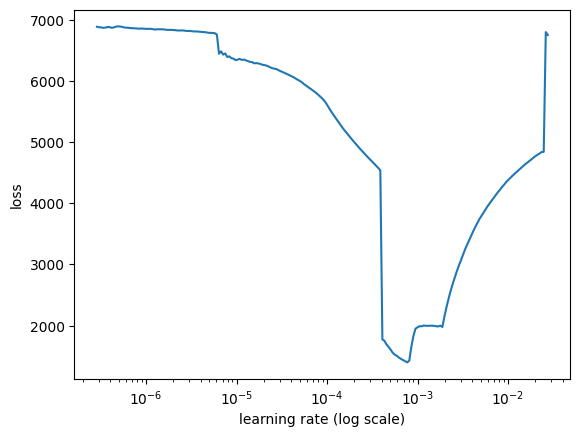

In [10]:
lr_finder = LRFinder(model)
lr_finder.find(x_train, y_train, start_lr=0.0000001, end_lr=100, batch_size=512, epochs=5)
lr_finder.plot_loss(n_skip_beginning=20, n_skip_end=5)
plt.show()

In [9]:
10e-4

0.001

### Training

In [15]:
epochs = 30
batch_size = 128

pipe = TrainingPipeline(name='RVAE_AtrialFibrillation', 
                        learning_rate=0.001,
                        model=model, 
                        num_epochs=epochs, 
                        batch_size=batch_size)

trained_model = pipe(x=x_train, y=y_train, x_val=x_val, y_val=y_val)

2024-04-06 14:01:03 [INFO]: +++ RVAE_AtrialFibrillation +++
2024-04-06 14:01:03 [INFO]: Creating folder in ./output_dir/RVAE_AtrialFibrillation_2024-04-06_14-01-03
2024-04-06 14:01:03 [INFO]: 
TRAINING STARTED
	Backend: tensorflow
	Eager mode: False
	Validation data available: True
	Callbacks set: ['EarlyStopping', 'ModelCheckpoint'] 



Epoch 1/30

Epoch 1: val_loss improved from inf to 4152.43115, saving model to ./output_dir/RVAE_AtrialFibrillation_2024-04-06_14-01-03/model.weights.h5
315/315 - 32s - 101ms/step - clf_loss: 1.2713 - kl_loss: 9.6406 - loss: 7506.2192 - reconstruction_loss: 740.8546 - val_clf_loss: 0.8361 - val_kl_loss: 9.8779 - val_loss: 4152.4312 - val_reconstruction_loss: 405.2816
Epoch 2/30

Epoch 2: val_loss improved from 4152.43115 to 4112.06494, saving model to ./output_dir/RVAE_AtrialFibrillation_2024-04-06_14-01-03/model.weights.h5
315/315 - 27s - 87ms/step - clf_loss: 1.0213 - kl_loss: 8.2646 - loss: 4523.9673 - reconstruction_loss: 444.0301 - val_clf_loss: 0.8585 - val_kl_loss: 6.4498 - val_loss: 4112.0649 - val_reconstruction_loss: 404.6709
Epoch 3/30

Epoch 3: val_loss improved from 4112.06494 to 3259.38354, saving model to ./output_dir/RVAE_AtrialFibrillation_2024-04-06_14-01-03/model.weights.h5
315/315 - 26s - 84ms/step - clf_loss: 0.7967 - kl_loss: 7.0340 - loss: 3615.8472 - reconstruct

2024-04-06 14:07:34 [INFO]: Restoring best model
2024-04-06 14:07:34 [INFO]: Best model restored


### Evaluation

1260/1260 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step


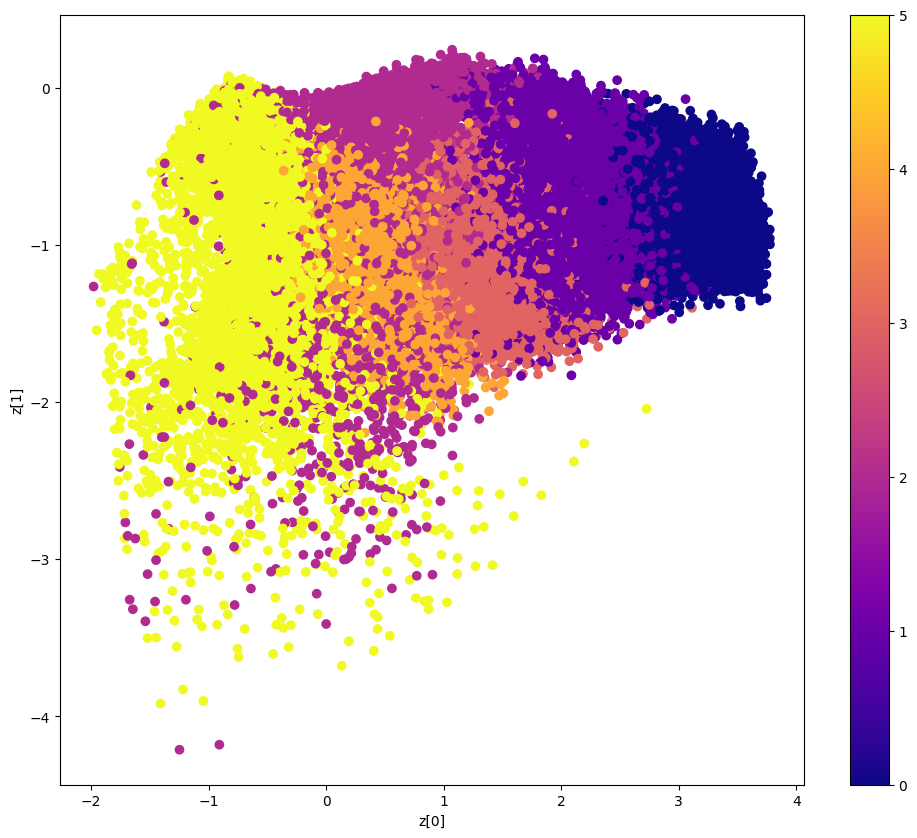

In [16]:
outputs = trained_model.predict(x_train)
plot_latent_space(outputs['z'], y_train)